In [1]:
!pip install opencv-python

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import cv2

In [23]:
file_name="akatsuki.jpg"
my_img1=cv2.imread(file_name,-1)
print(f"scanned:{file_name}")

scanned:akatsuki.jpg


In [24]:
print(my_img1.shape)
print(type(my_img1))
print(my_img1.dtype)
print("=="*20)
print(my_img1)

(1080, 1920, 3)
<class 'numpy.ndarray'>
uint8
[[[104  70 241]
  [105  71 242]
  [106  72 243]
  ...
  [105  71 242]
  [106  71 245]
  [106  71 245]]

 [[104  70 241]
  [106  72 243]
  [107  73 244]
  ...
  [106  72 243]
  [107  72 246]
  [108  73 247]]

 [[105  71 242]
  [106  72 243]
  [107  73 244]
  ...
  [104  70 241]
  [104  69 243]
  [104  69 243]]

 ...

 [[  0   0   6]
  [  1   0   7]
  [  2   0   8]
  ...
  [ 44   9  59]
  [ 37   0 107]
  [ 63  25 161]]

 [[  2   0   4]
  [  2   0   4]
  [  3   0   5]
  ...
  [ 50  14  60]
  [ 36   0  98]
  [ 60  22 151]]

 [[ 14  10  15]
  [ 14  10  15]
  [ 15  11  17]
  ...
  [ 53  19  60]
  [ 33   0  93]
  [ 57  20 144]]]


In [56]:
file_name="gtr.jpg"
my_img2=cv2.imread(file_name,-1)
print(f"scanned:{file_name}")

scanned:gtr.jpg


In [57]:
print(my_img2.shape)
print(type(my_img2))
print(my_img2.dtype)
print("=="*20)
print(my_img2)

(2160, 3840, 3)
<class 'numpy.ndarray'>
uint8
[[[102  89  67]
  [102  90  66]
  [103  91  67]
  ...
  [ 84  72  54]
  [ 83  71  53]
  [ 83  71  53]]

 [[101  89  65]
  [102  90  66]
  [103  91  67]
  ...
  [ 83  71  53]
  [ 83  71  53]
  [ 83  71  53]]

 [[102  91  64]
  [102  91  64]
  [103  91  67]
  ...
  [ 83  71  53]
  [ 83  71  53]
  [ 83  71  53]]

 ...

 [[ 69  64  49]
  [ 79  73  50]
  [ 90  82  53]
  ...
  [ 40  33  24]
  [ 40  33  24]
  [ 41  34  25]]

 [[ 60  57  42]
  [ 75  70  49]
  [ 87  80  53]
  ...
  [ 40  34  23]
  [ 39  33  22]
  [ 40  33  24]]

 [[ 56  57  37]
  [ 72  70  46]
  [ 84  78  55]
  ...
  [ 41  35  24]
  [ 39  33  22]
  [ 39  33  22]]]


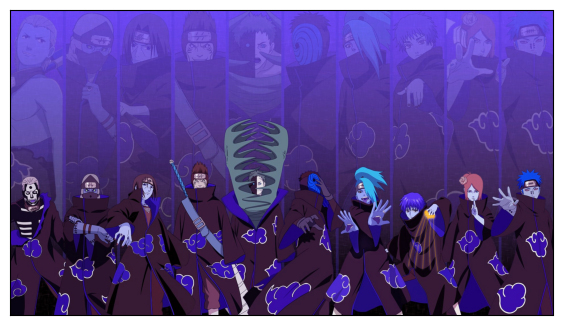

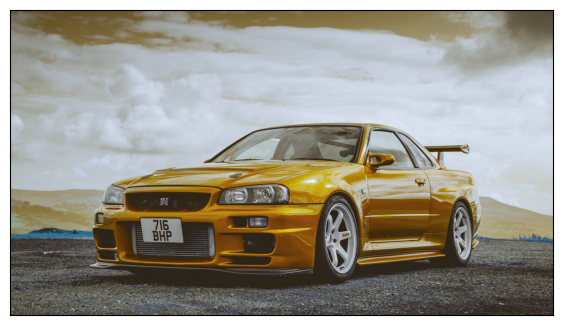

In [58]:
import matplotlib.pyplot as plt

 # Number of rows and columns in the plot:
kwargs = {"Ni_rows":1, "Ni_cols":1}

def plot_images(img_pix_data, **kwargs):
    boxsize = 7
    f = plt.figure(figsize=(boxsize, 0.80*boxsize))

    iframe = 1
    for i in range(0, kwargs["Ni_rows"]):
        for j in range(0, kwargs["Ni_cols"]):
            pt1 = plt.subplot(kwargs["Ni_rows"], kwargs["Ni_cols"], iframe)
            pt2 = plt.subplot(kwargs["Ni_rows"], kwargs["Ni_cols"], iframe)
    #pt1.imshow(img_pix_data, cmap = plt.cm.binary)
            pt1.imshow(img_pix_data)
            pt2.imshow(img_pix_data)
    #pt1.imshow(img_pix_data, cmap = "gray")
    
    # Remove x, y axes labels
            pt1.xaxis.set_tick_params(labelbottom=False)
            pt1.yaxis.set_tick_params(labelleft=False)
            pt2.xaxis.set_tick_params(labelbottom=False)
            pt2.yaxis.set_tick_params(labelleft=False)
     # Remove x, y axes ticks
            pt1.set_xticks([])
            pt1.set_yticks([])
            pt2.set_xticks([])
            pt2.set_yticks([])
             
            iframe += 1
 # Number of rows and columns in the plot:
kwargs = {"Ni_rows":1, "Ni_cols":1}
plot_images(my_img1, **kwargs)
plot_images(my_img2, **kwargs)

(1080, 1920)
(2160, 3840)

Reshaped pixel vector:
(2073600,)
[138.33333333 139.33333333 140.33333333 ...  44.          42.
  73.66666667]
(8294400,)
[86. 86. 87. ...  0.  0.  0.]


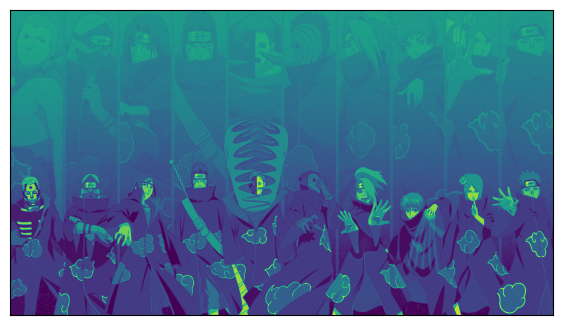

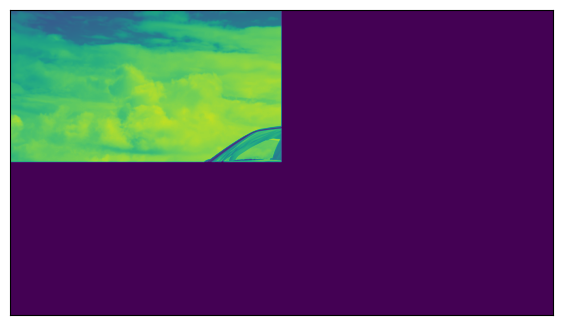

In [59]:
#dimension reduction of imgs

import numpy as np
 # define appropriate pixel matrix:
pix_rows1, pix_cols1, _ = my_img1.shape
pix_rows2,pix_cols2,_=my_img2.shape
# it is a three-dim array

avg_pixel_array1 = np.zeros((pix_rows1, pix_cols1))
avg_pixel_array2 = np.zeros((pix_rows2, pix_cols2))
print(avg_pixel_array1.shape)
print(avg_pixel_array2.shape)

for i in range(0, pix_rows1):
    for j in range(0, pix_cols1):
        avg_pixel_array1[i][j] = (int(my_img1[i,j,0]) + \
                                int(my_img1[i,j,1]) + \
                                int(my_img1[i,j,2]))/3
        avg_pixel_array2[i][j] = (int(my_img2[i,j,0]) +int(my_img2[i,j,1])+int(my_img2[i,j,2]))/3

 # Plot image with average RGB value:
 # Number of rows and columns in the plot:
kwargs = {"Ni_rows":1, "Ni_cols":1}
plot_images(avg_pixel_array1, **kwargs)
plot_images(avg_pixel_array2, **kwargs)
print()


# feature vector for one image
Xi = np.reshape(avg_pixel_array1,pix_rows1*pix_cols1)
vi=np.reshape(avg_pixel_array2,pix_rows2*pix_cols2)
print("=="*20)
print("Reshaped pixel vector:")
print(Xi.shape)
print(Xi)
print(vi.shape)
print(vi)

(1080, 1920)
img1_resized1 (200, 200)
(2160, 3840)
img2_resized2 (200, 200)


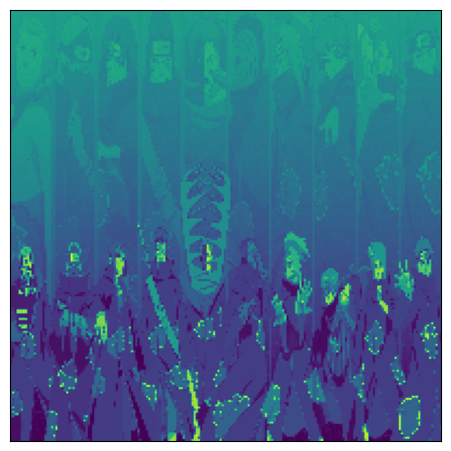

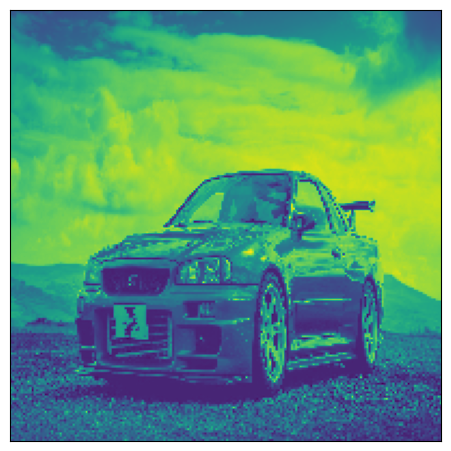

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
pix_rows, pix_cols, _ = my_img1.shape # it is a three-dim array
avg_pixel_array = np.zeros((pix_rows, pix_cols))
print(avg_pixel_array.shape)
for i in range(0, pix_rows):
    for j in range(0, pix_cols):
        avg_pixel_array[i][j] = (int(my_img1[i,j,0]) + \
                                 int(my_img1[i,j,1]) + \
                                 int(my_img1[i,j,2]))/3
#redducing the size of image into 200x200

resized_img1 = cv2.resize(avg_pixel_array, (200,200))
print('img1_resized1',resized_img1.shape)


pix_rows, pix_cols, _ = my_img2.shape # it is a three-dim array
avg_pixel_array1 = np.zeros((pix_rows, pix_cols))
print(avg_pixel_array1.shape)
for i in range(0, pix_rows):
    for j in range(0, pix_cols):
        avg_pixel_array1[i][j] = (int(my_img2[i,j,0]) + \
        int(my_img2[i,j,1]) + \
        int(my_img2[i,j,2]))/3
#redducing the size of image into 200x200
resized_img2 = cv2.resize(avg_pixel_array1, (200,200))
print('img2_resized2',resized_img2.shape)
kwargs = {"Ni_rows":1,"Ni_cols":1}
plot_images(resized_img1,**kwargs)
plot_images(resized_img2,**kwargs)



In [61]:

# Euclidean distance between two vectors
resized_img=cv2.resize(my_img1,(100,100))
resized_img1=cv2.resize(my_img2,(100,100))

dist1 = np.linalg.norm(resized_img-resized_img1)
# printing Euclidean distance
print(f"the Euclidean distance is ")
print(dist1)


the Euclidean distance is 
28257.96160376753
